In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
# این رو انجام میدیم که همیشه یک دیتا بگیریم
np.random.seed(0)

In [3]:
x, y = make_blobs( n_samples=5000,centers= [[4,4], [-2,-1], [2,-3], [1,1]], cluster_std=0.9)
print(x)
print(y)

[[-1.82150565  0.07098024]
 [ 2.16732621 -2.93199608]
 [ 0.8465158  -3.26075305]
 ...
 [ 3.29772603  4.24400152]
 [-1.69503125 -0.29979681]
 [-1.64362141  0.63035513]]
[1 2 2 ... 0 1 1]


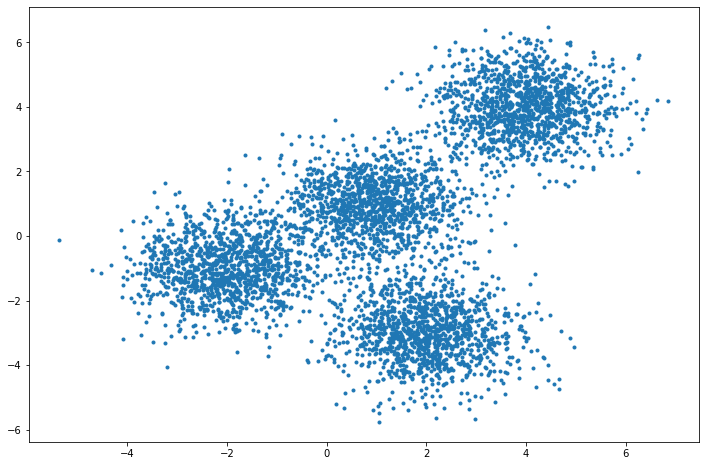

In [4]:
plt.figure(figsize= (12,8))
plt.scatter(x[:, 0], x[:, 1], marker='.')
plt.show()

In [5]:
k_means = KMeans(n_clusters= 4, init='k-means++', n_init=12)

In [11]:
k_means.fit(x)

KMeans(n_clusters=4, n_init=12)

In [12]:
k_means_labels = k_means.labels_
print(k_means_labels[:])

[3 2 2 ... 1 3 3]


In [13]:
k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

[[ 0.96900523  0.98370298]
 [ 3.97334234  3.98758687]
 [ 1.99741008 -3.01666822]
 [-2.03743147 -0.99782524]]


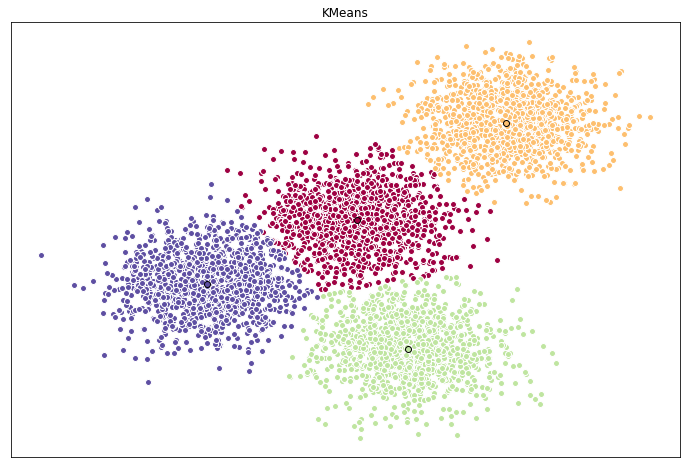

In [17]:
fig = plt.figure(figsize=(12,8))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len(k_means_cluster_centers)), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor=col, marker='o')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
    


# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

In [27]:
cust_df = pd.read_csv('Cust_Segmentation.csv')
cust_df.head()

TypeError: '(0, slice(None, None, None))' is an invalid key

In [23]:
df=cust_df.drop('Address',axis = 1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [30]:
from sklearn.preprocessing import StandardScaler
x = df.values[:,1:]
x = np.nan_to_num(x)
df = StandardScaler().fit_transform(x)
df

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [32]:
clusterNum = 3
k_means = KMeans(n_clusters= clusterNum, init='k-means++',n_init=12)
k_means.fit(x)
labels = k_means.labels_
labels

array([2, 0, 2, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1,
       2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0,
       1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,

In [35]:
cust_df['Clust_km'] = labels
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Clust_km
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2,1


In [39]:
cust_df.groupby('Clust_km').mean()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clust_km,,,,,,,,,
0,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761


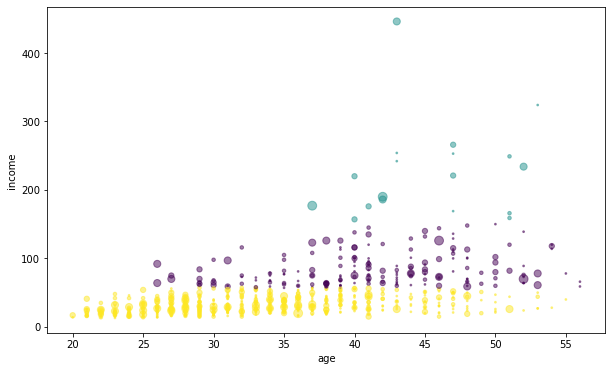

In [42]:
plt.figure(figsize = (10, 6))
area = np.pi * (x[:,1])**2
plt.scatter(x[:,0], x[:, 3], s=area, c=labels, alpha = 0.5)
plt.xlabel('age')
plt.ylabel('income')
plt.show()